In [17]:
!pip install torch


In [18]:
import torch

In [19]:
import torch.nn as nn

In [20]:
import math

In [28]:
import matplotlib.pyplot as plt

In [29]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]

Positional Encoding for 1D:
tensor([[[ 0.0000]],

        [[ 0.8415]],

        [[ 0.9093]],

        [[ 0.1411]],

        [[-0.7568]]])


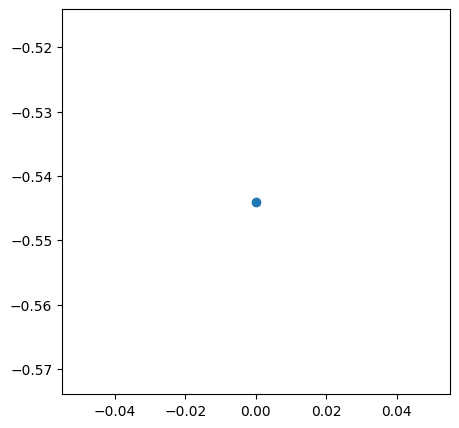

In [37]:
#one dimension
pe_1d = PositionalEncoding(1)
print("Positional Encoding for 1D:")
print(pe_1d.pe[:5]) # Printing first 5 positions
plt.figure(figsize=(5, 5))
plt.plot(pe_1d.pe[fixed_position, 0, :].squeeze().numpy(), marker='o', linestyle='-', label='1D')


Positional Encoding for 128D:
tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000

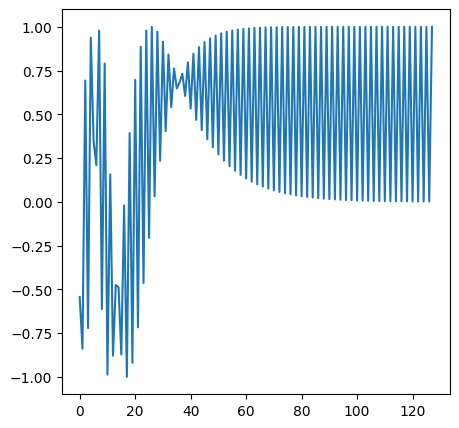

In [36]:
# 128 dimension
pe_128d = PositionalEncoding(128)
print("\nPositional Encoding for 128D:")
print(pe_128d.pe[:5]) # Printing  first 5 positions
plt.figure(figsize=(5, 5))
plt.plot(pe_128d.pe[fixed_position, 0, :].squeeze().numpy(), label='128D')


Positional Encoding for 512D:
tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00]],

        [[ 8.4147e-01,  5.4030e-01,  8.2186e-01,  ...,  1.0000e+00,
           1.0366e-04,  1.0000e+00]],

        [[ 9.0930e-01, -4.1615e-01,  9.3641e-01,  ...,  1.0000e+00,
           2.0733e-04,  1.0000e+00]],

        [[ 1.4112e-01, -9.8999e-01,  2.4509e-01,  ...,  1.0000e+00,
           3.1099e-04,  1.0000e+00]],

        [[-7.5680e-01, -6.5364e-01, -6.5717e-01,  ...,  1.0000e+00,
           4.1465e-04,  1.0000e+00]]])


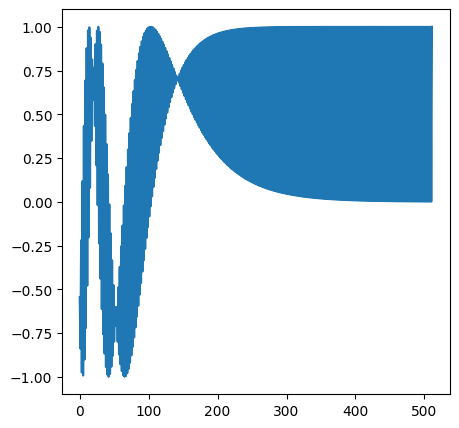

In [39]:
#512d implementtion
pe_512d = PositionalEncoding(512)
print("\nPositional Encoding for 512D:")
print(pe_512d.pe[:5]) # Printing first 5 positions
plt.figure(figsize=(5, 5))
plt.plot(pe_512d.pe[fixed_position, 0, :].squeeze().numpy(), label='512D')

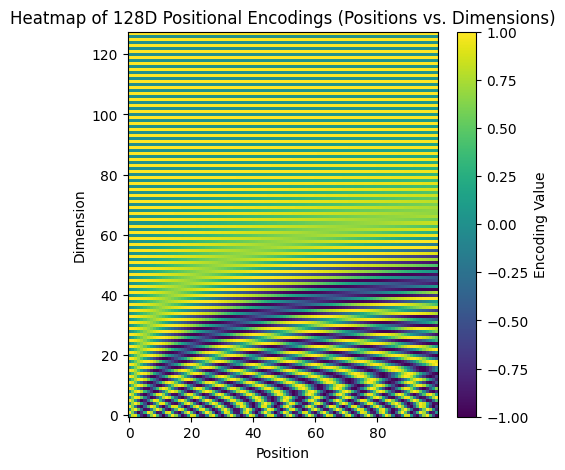

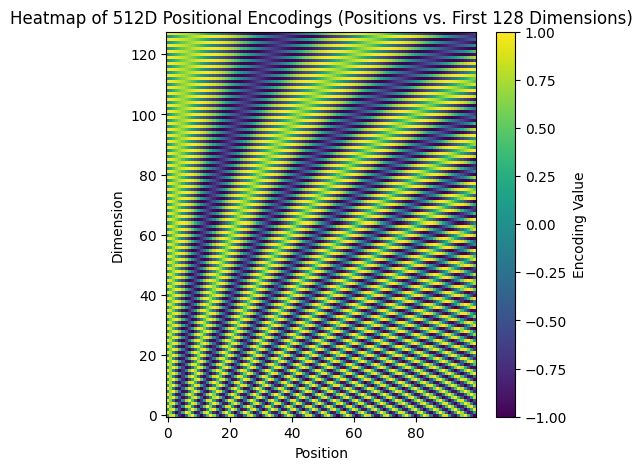

In [42]:
#heatmaps
positions_for_heatmap = 100
dimensions_for_heatmap_128 = 128
dimensions_for_heatmap_512 = 128

plt.figure(figsize=(5, 5))
plt.imshow(pe_128d.pe[:positions_for_heatmap, 0, :dimensions_for_heatmap_128].squeeze().T.numpy(), aspect='auto', origin='lower', cmap='viridis')
plt.title('Heatmap of 128D Positional Encodings (Positions vs. Dimensions)')
plt.xlabel('Position')
plt.ylabel('Dimension')
plt.colorbar(label='Encoding Value')
plt.show()


plt.figure(figsize=(5, 5))
plt.imshow(pe_512d.pe[:positions_for_heatmap, 0, :dimensions_for_heatmap_512].squeeze().T.numpy(), aspect='auto', origin='lower', cmap='viridis')
plt.title(f'Heatmap of 512D Positional Encodings (Positions vs. First {dimensions_for_heatmap_512} Dimensions)')
plt.xlabel('Position')
plt.ylabel('Dimension')
plt.colorbar(label='Encoding Value')
plt.show()



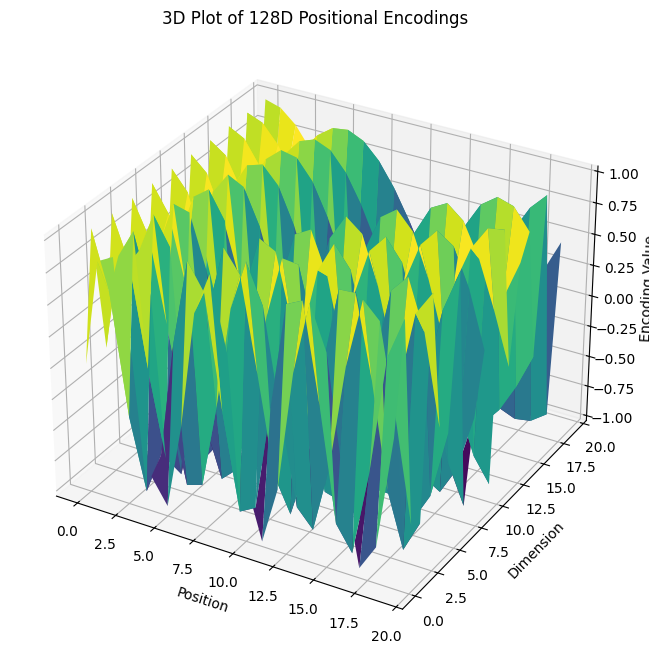

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

positions_3d = 20
dimensions_3d = 20
X = torch.arange(positions_3d).repeat(dimensions_3d, 1).T.numpy()
Y = torch.arange(dimensions_3d).repeat(positions_3d, 1).numpy()
Z = pe_128d.pe[:positions_3d, 0, :dimensions_3d].squeeze().numpy()
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Position')
ax.set_ylabel('Dimension')
ax.set_zlabel('Encoding Value')
ax.set_title('3D Plot of 128D Positional Encodings ')
plt.show()
